In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Data 100 Final Project: COVID-19

COVID-19 has affected all segments of the population and people's daily life. Countless countries have decided to lockdown and cancel all international flights, causing a great economic loss globally. In this project, we want to explore the data about COVID-19 and extract helpful information. 

Author: Richard Xue (rixue@berkeley.edu), Hojung Jeong (hojung1019@berkeley.edu), Jiale Sun (sunjiale68732085@berkeley.edu)

## 1. Project Objective: 

1. Predict the maximum confirmed cases and the time of new cases approach to zero for all counties in the US. 
2. Predict the death rate for each county in the US, and the largest reasons (according to the data we have) that cause the variation of death rate.

We choose these objective because estimating the ending time and death rate is critical to all countries’ decision making. 

# 2. Data Cleaning

### 2.1 Loading Data

In [2]:
""" Import CSV file """

confirmed_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
confirmed_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,145,145,145,149,149,151,151,151,151,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,15,15,15,16,16,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,66,66,66,66,68,68,69,69,69


In [3]:
death_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,97,97,99,99,102,107,108,111,113,114
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,4,4,4,4,4,4,4,4,5,6


In [4]:
abridged_counties = pd.read_csv('https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv')
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [5]:
states_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-18-2020.csv')
states_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


### 2.2 Data Cleaning

Brief Description: In this project, we are solving problems only for counties in 50 states. Thus, we remove all these districts in the given datasets. 
Abridged counties has a lot of data. We break the whole dataset into 3 sub-datasets, med, pop, and policy, according to the meaning of their columns. 
We also drop the columns that contain too much NaN, and fill the rest with 0 (only numerical data contains NaN).

First we clean confirmed_data and death_data:

In [6]:
# Helper function: A function to check the columns contains NaN ina dataframe
def nan_col(df):
    nan=[]
    for col in df.columns:
        if df.isna()[col].any():
            nan.append(col)
    return nan

In [7]:
cd = confirmed_data.copy()
dd = death_data.copy()

In [8]:
# Drop places outside 50 states
cd = cd.rename(columns={'Admin2':'CountyName', 'Province_State':'State'})
dd = dd.rename(columns={'Admin2':'CountyName', 'Province_State':'State'})

cd = cd.drop([0, 1, 2, 3, 4, 3200, 3252, 324, 3157, 3209])
dd = dd.drop([0, 1, 2, 3, 4, 3200, 3252, 324, 3157, 3209])
cd = cd.drop(cd[cd['State'] == 'Rhode Island'].index)
dd = dd.drop(dd[dd['State'] == 'Rhode Island'].index)

# Drop places without a county name
cd = cd.drop(cd[cd['CountyName'] == 'Unassigned'].index)

In [9]:
# Drop unnecessary columns
cd = cd.drop(columns={'code3','UID', 'iso2', 'iso3', 'Country_Region', 'FIPS', 'Lat', 'Long_'})
dd = dd.drop(columns={'code3','UID', 'iso2', 'iso3', 'Country_Region', 'FIPS', 'Lat', 'Long_'})

In [10]:
cd.head()

,CountyName,State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
5,Autauga,Alabama,"Autauga, Alabama, US",0,0,0,0,0,0,0,...,48,53,53,58,61,67,68,74,84,91
6,Baldwin,Alabama,"Baldwin, Alabama, US",0,0,0,0,0,0,0,...,187,188,189,196,205,208,216,222,224,227
7,Barbour,Alabama,"Barbour, Alabama, US",0,0,0,0,0,0,0,...,45,45,47,47,51,53,58,59,61,67
8,Bibb,Alabama,"Bibb, Alabama, US",0,0,0,0,0,0,0,...,43,42,43,43,44,44,45,46,46,46
9,Blount,Alabama,"Blount, Alabama, US",0,0,0,0,0,0,0,...,40,40,40,42,44,44,44,44,45,45


In [11]:
dd.head()

,CountyName,State,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
5,Autauga,Alabama,"Autauga, Alabama, US",55869,0,0,0,0,0,0,...,3,3,3,3,3,4,4,4,4,4
6,Baldwin,Alabama,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,...,4,4,5,5,5,5,5,5,6,7
7,Barbour,Alabama,"Barbour, Alabama, US",24686,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,Bibb,Alabama,"Bibb, Alabama, US",22394,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
9,Blount,Alabama,"Blount, Alabama, US",57826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Make sure there is no NaN in the data
for col in cd.columns:
    if cd.isna()[col].any():
        print(col)
for col in dd.columns:
    if dd.isna()[col].any():
        print(col)

Then we clean abridged_counties and state_data:

In [13]:
ac = abridged_counties.copy()

In [14]:
ac.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [15]:
# Add column combined key

county_name = ac['CountyName'].values
state = ac['State'].values

combined = []
for i in range(len(county_name)):
    if (type(state[i]) != str):
        combined.append(county_name[i] + ', US')
        continue
    combined.append(county_name[i] + ', ' + state[i] + ', US')

ac['Combined_Key'] = combined

In [16]:
# Fix the State Name based on their abbreviations
for i in ac[ac['State'].isna()].index:
    if ac['StateName'].iloc[i] == 'AK':
        ac.at[i, 'State'] = 'Alaska'
        ac.at[i, 'lat'] = 64.2008
        ac.at[i, 'lon'] = -149.4937
    elif ac['StateName'].iloc[i] == 'FL':
        ac.at[i, 'State'] = 'Florida'
    elif ac['StateName'].iloc[i] == 'HI':
        ac.at[i, 'State'] = 'Hawaii'
    elif ac['StateName'].iloc[i] == 'MT':
        ac.at[i, 'State'] = 'Montana'
    elif ac['StateName'].iloc[i] == 'VA':
        ac.at[i, 'State'] = 'Virginia'
    elif ac['StateName'].iloc[i] == 'MO':
        ac.at[i, 'State'] = 'Missouri'
    elif ac['StateName'].iloc[i] == 'NY':
        ac.at[i, 'State'] = 'New York'

In [17]:
# Remove rows of US territories besides 50 states
ac = ac.drop(ac[ac['State'].isna()].index)
ac = ac.drop(ac[ac['State'] == 'District Of Columbia'].index)
ac = ac.drop(ac[ac['PopulationEstimate2018'].isna()].index)

In [18]:
# Make a dataset about population from dataset abridged_counties
pop = ac[['CountyName', 'State', 'Combined_Key','PopulationEstimate2018', 'PopTotalMale2017', \
          'PopTotalFemale2017', 'FracMale2017', \
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010', \
       'CensusPopulation2010', 'MedianAge2010', 'PopMale<52010', \
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010', \
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010', \
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010', \
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010', \
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010', \
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010', \
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010', \
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010']]
pop = pop.merge(dd[['Combined_Key', 'Population']], on='Combined_Key')
pop = pop.fillna(0)
pop.head()

,CountyName,State,Combined_Key,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,...,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,Population
0,Autauga,Alabama,"Autauga, Alabama, US",55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,...,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,55869
1,Baldwin,Alabama,"Baldwin, Alabama, US",218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,...,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,223234
2,Barbour,Alabama,"Barbour, Alabama, US",24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,...,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,24686
3,Bibb,Alabama,"Bibb, Alabama, US",22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,...,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,22394
4,Blount,Alabama,"Blount, Alabama, US",57840.0,28607.0,29406.0,0.493114,10351.0,88.9,57322.0,...,4017.0,1810.0,1884.0,1700.0,1882.0,2391.0,2688.0,1102.0,1450.0,57826


In [19]:
# Make a dataset about medication from dataset abridged_counties
med = ac[['CountyName', 'State', 'Combined_Key', '#EligibleforMedicare2018', \
       'MedicareEnrollment,AgedTot2017',  \
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality', \
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017', \
       "TotalM.D.'s,TotNon-FedandFed2017", '#Hospitals', '#ICU_beds']]
med = med.fillna(0)
med.head()

,CountyName,State,Combined_Key,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#Hospitals,#ICU_beds
0,Autauga,Alabama,"Autauga, Alabama, US",11439.0,8046.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,1.0,6.0
1,Baldwin,Alabama,"Baldwin, Alabama, US",54145.0,41590.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,3.0,51.0
2,Barbour,Alabama,"Barbour, Alabama, US",6681.0,4706.0,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,1.0,5.0
3,Bibb,Alabama,"Bibb, Alabama, US",5128.0,3389.0,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,1.0,0.0
4,Blount,Alabama,"Blount, Alabama, US",13175.0,9542.0,14.9,224.8,52.8,19.208672,87.05,103.0,18.0,1.0,6.0


In [20]:
# Make a dataset about government policies from dataset abridged_counties
policy = ac[['CountyName', 'State', 'Combined_Key', 'stay at home', '>50 gatherings',
       '>500 gatherings', 'public schools', 'restaurant dine-in',
       'entertainment/gym', 'federal guidelines', 'foreign travel ban',
       'SVIPercentile', 'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop']]
policy.head()

,CountyName,State,Combined_Key,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,Autauga,Alabama,"Autauga, Alabama, US",737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,Baldwin,Alabama,"Baldwin, Alabama, US",737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,Barbour,Alabama,"Barbour, Alabama, US",737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,Bibb,Alabama,"Bibb, Alabama, US",737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,Blount,Alabama,"Blount, Alabama, US",737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [21]:
sd = states_data.copy()

In [22]:
sd = sd.drop(columns={'Last_Update', 'FIPS', 'UID', 'ISO3', 'Lat', 'Long_'})

In [23]:
# sd = sd.drop(sd[sd['Country_Region'] != 'US'].index);
sd = sd.rename(columns={'Admin2':'CountyName', 'Province_State':'State'})
sd = sd.fillna(0);
sd.head()

,State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,0.0,4559.0,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
1,Alaska,US,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
2,American Samoa,US,0,0,0.0,0.0,0.000000,3.0,0.0,0.000000,5.391708,0.000000
3,Arizona,US,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
4,Arkansas,US,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,932.435235,16.685780


In [24]:
# Make sure there is no NaN in the data
for col in pop.columns:
    if pop.isna()[col].any():
        print(col)
for col in med.columns:
    if med.isna()[col].any():
        print(col)
for col in sd.columns:
    if sd.isna()[col].any():
        print(col)

# 3. EDA

## a) Predict Future and Maximum Confirmed Cases

We want to predict for all counties. Doing that we need around three thousands plots. Thus, we select 7 famous counties to do data analysis. Four of them are in California, the other three are the capitals of their states. We will still train the model with the whole dataset.

In [25]:
county_choice = ['New York City, New York, US', 'Los Angeles, California, US', 'Alameda, California, US', \
                 'San Francisco, California, US',  \
                 'Sacramento, California, US', 'Philadelphia, Pennsylvania, US', 'Cook, Illinois, US']

In [26]:
# Select data from a dataframe that only contains specific district
def select_data(lst, df):
    """
        Input: 
            lst: list of counties
            df: target dataframe
        Output:
            Dataframe that only contains counties in lst.
    """
    
    frames = []
    for i in range(len(lst)):
        frames.append(df[df['Combined_Key'] == lst[i]])
    
    return pd.concat(frames)


### a1. Clean and Transform the data

In [27]:
# Only use county names and date
confirmed_dates = confirmed_data.iloc[:, range(11, confirmed_data.shape[1])]

# Set index to combined key
confirmed_dates = confirmed_dates.set_index(confirmed_data.loc[:, 'Combined_Key'])

# Insert county column at the beginning
confirmed_dates.insert(loc=0, column='county', value=confirmed_dates.index)

confirmed_dates.head()


,county,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"American Samoa, US","American Samoa, US",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Guam, US","Guam, US",0,0,0,0,0,0,0,0,0,...,145,145,145,149,149,151,151,151,151,152
"Northern Mariana Islands, US","Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,...,14,14,14,15,15,15,16,16,19,19
"Puerto Rico, US","Puerto Rico, US",0,0,0,0,0,0,0,0,0,...,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299
"Virgin Islands, US","Virgin Islands, US",0,0,0,0,0,0,0,0,0,...,66,66,66,66,66,68,68,69,69,69


In [28]:
# Melt the county name to each date, and only keeps the entries that have confirmed_cases
melt_confirmed_dates = pd.melt(confirmed_dates, id_vars = ['county'], \
                               value_vars = list(confirmed_dates.columns[1 : -1]), \
                               var_name = 'date', value_name = 'confirmed_cases')
melt_confirmed_dates = melt_confirmed_dates[melt_confirmed_dates['confirmed_cases'] != 0]

melt_confirmed_dates.head()

,county,date,confirmed_cases
2974,"King, Washington, US",1/22/20,1
6235,"King, Washington, US",1/23/20,1
7137,"Cook, Illinois, US",1/24/20,1
9496,"King, Washington, US",1/24/20,1
10398,"Cook, Illinois, US",1/25/20,1


In [29]:
# Store each county as a dataframe, and put all of them in a list

# Here we only process the counties we chose for the sake of runtime. If you want to apply for the whole dataset
# Comment this line and,
county_n = county_choice 

# Uncomment the following line (would take an hour)
# county_n = confirmed_dates.index.size

list_by_county = []
for i in range(len(county_n)):
    list_by_county.append(melt_confirmed_dates[melt_confirmed_dates['county'] == county_n[i]])

In [30]:
# Iterate through all counties and change the date of first confirmed case to day 0, the next day to day 1, ...

for ct in range(len(list_by_county)):
    df = list_by_county[ct]
    ind = df.index
    for i in range(ind.size):
        df.loc[ind[i], 'date'] = i
list_by_county[0].head()

/Library/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,county,date,confirmed_cases
132303,"New York City, New York, US",0,1
135564,"New York City, New York, US",1,1
138825,"New York City, New York, US",2,1
142086,"New York City, New York, US",3,4
145347,"New York City, New York, US",4,11


In [31]:
# Add a column of the number of daily increase of confirmed cases compared to previous day

list_by_county_full = []
for county in list_by_county:
    increase_rate = []
    ind = county.index
    for i in range(ind.size):
        # First entry is the first day increase
        if i == 0:
            increase_rate.append(county.loc[ind[i], 'confirmed_cases'])
        else:
            difference = county.loc[ind[i], 'confirmed_cases'] - county.loc[ind[i - 1], 'confirmed_cases']
            increase_rate.append(difference)
    
    county_full = county.assign(increased_cases = increase_rate)
    list_by_county_full.append(county_full)
list_by_county_full[0].head()

,county,date,confirmed_cases,increased_cases
132303,"New York City, New York, US",0,1,1
135564,"New York City, New York, US",1,1,0
138825,"New York City, New York, US",2,1,0
142086,"New York City, New York, US",3,4,3
145347,"New York City, New York, US",4,11,7


In [32]:
# Add a column of log of confirmed_cases to fit a linear model (data tranformation). (FIXME: try w/o log)

for county in list_by_county_full:
    county['log_confirmed_cases'] = np.log(county['confirmed_cases'])
list_by_county_full[0].head()

,county,date,confirmed_cases,increased_cases,log_confirmed_cases
132303,"New York City, New York, US",0,1,1,0.000000
135564,"New York City, New York, US",1,1,0,0.000000
138825,"New York City, New York, US",2,1,0,0.000000
142086,"New York City, New York, US",3,4,3,1.386294
145347,"New York City, New York, US",4,11,7,2.397895


### a2. Train different models and Compare

In [33]:
# We create 3 different models for each single county to fit the line of increase.
#    First Model: linear model     y = ax
#            - No intecept, since there's no case on day 0
#    Second Model: log         y = e ** (ax + b)
#    Third Model:  log_diff     dy/dt = ay 
#            - Compute increased cases as dy/dt.

# Here, we only store the coefficient of the model that we trained.

linear_models = []
log_models = []
log_diff_models = []

for county in list_by_county_full:
    linear_model = LinearRegression(fit_intercept = False)
    log_model = LinearRegression(fit_intercept = True)
    log_diff_model = LinearRegression(fit_intercept = False)
    
    # Linear Model and Log Model chooses the date column as the feature
    # Log Difference uses daily increased cases as the feature
    X = county['date'].values.reshape(-1,1)
    
    Y_linear = county['confirmed_cases']
    Y_log = county['log_confirmed_cases']
    
    X_log_diff = county['increased_cases'].values.reshape(-1,1)
    
    
    linear_model.fit(X, Y_linear)
    log_model.fit(X, Y_log)
    log_diff_model.fit(X_log_diff, Y_linear)
    
    log_models.append([log_model.coef_[0], log_model.intercept_])
    linear_models.append(linear_model.coef_[0])
    log_diff_models.append(log_diff_model.coef_[0])


In [34]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [35]:
# Compute and compare RMSE for three models

model_n = len(linear_models)

# yhat = a * x
linear_rmse = [rmse(linear_models[i] * list_by_county_full[i]['date'], \
                list_by_county_full[i]['confirmed_cases']) for i in range(model_n)]

# yhat = e ** (ax + b)
log_rmse = [rmse(np.e ** (log_models[i][0] * list_by_county_full[i]['date'] + log_models[i][1]), \
                  list_by_county_full[i]['confirmed_cases']) for i in range(model_n)]

# a * yhat = dy/dx
log_diff_rmse = [rmse(log_diff_models[i] * list_by_county_full[i]['increased_cases'], \
                    list_by_county_full[i]['confirmed_cases']) for i in range(model_n)]


In [36]:
# Choose the model with lower RMSE
log_or_linear = []

for i in range(len(linear_rmse)):
    if linear_rmse[i] == min([linear_rmse[i], log_rmse[i], log_diff_rmse[i]]):
        log_or_linear.append('linear')
    elif log_rmse[i] == min([linear_rmse[i], log_rmse[i], log_diff_rmse[i]]):
        log_or_linear.append('log')
    else:
        log_or_linear.append('log_diff')


In [37]:
total_dates = [list_by_county_full[i].iloc[-1, 1] for i in range(len(list_by_county))]
total_cases = [list_by_county_full[i].iloc[-1, 2] for i in range(len(list_by_county))]

In [38]:
# Create a dataframe that has all model information for EDA

data = {'county' : [county.iloc[0, 0] for county in list_by_county_full], 'linear_coef' : linear_models, \
        'linear_rmse' : linear_rmse, 'log_coef' : log_models, 'log_rmse' : log_rmse, \
        'log_diff_coef' : log_diff_models, 'log_diff_rmse' : log_diff_rmse, 'log_or_linear' : log_or_linear, \
        'total_date' : total_dates, 'total_cases' : total_cases}
list_by_county_models = pd.DataFrame(data = data)
list_by_county_models.head()

,county,linear_coef,linear_rmse,log_coef,log_rmse,log_diff_coef,log_diff_rmse,log_or_linear,total_date,total_cases
0,"New York City, New York, US",2540.797508,23002.640150,"[0.1503179561135225, 4.12484734551548]",465335.030649,23.473840,73113.007357,linear,70,185357
1,"Los Angeles, California, US",156.935779,6450.031372,"[0.13138898478088007, -2.019758093373948]",20603.249930,19.310195,6152.991983,log_diff,106,32263
2,"Alameda, California, US",24.751794,258.521665,"[0.10874197888578561, 1.5818665639776253]",1589.208036,19.351700,647.930699,linear,69,2101
3,"San Francisco, California, US",25.246873,191.403384,"[0.0857142132988007, 2.890374831409664]",925.177738,21.104606,625.016884,linear,67,1954
4,"Sacramento, California, US",13.365160,198.823842,"[0.10261261680971709, 0.47848313732144376]",1075.412984,13.202212,553.569543,linear,80,1173


In [39]:
# Find the coefficient for logistic curve

logistic_model_data = []
for county in list_by_county_full:
    data = county.loc[:, ['county', 'confirmed_cases', 'increased_cases']].copy()
    data['confirmed_cases_square'] = np.square(data['confirmed_cases'])
    logistic_model_data.append(data)

logistic_models_x2 = []
logistic_models_x = []
for county in logistic_model_data:
    logistic_model = LinearRegression(fit_intercept = False)
    X = county.loc[:, ['confirmed_cases_square', 'confirmed_cases']]
    Y = county['increased_cases']
    logistic_model.fit(X, Y)
    logistic_models_x2.append(logistic_model.coef_[0])
    logistic_models_x.append(logistic_model.coef_[1])

In [40]:
# Predict the possible maximum cases of each county

maximun_cases = - np.divide(logistic_models_x, logistic_models_x2)
list_by_county_models['possible_maximun_cases'] = pd.Series(maximun_cases)
list_by_county_models[list_by_county_models['possible_maximun_cases'] > 0].sort_values \
                    ('possible_maximun_cases', ascending = False).head()

,county,linear_coef,linear_rmse,log_coef,log_rmse,log_diff_coef,log_diff_rmse,log_or_linear,total_date,total_cases,possible_maximun_cases
0,"New York City, New York, US",2540.797508,23002.640150,"[0.1503179561135225, 4.12484734551548]",465335.030649,23.473840,73113.007357,linear,70,185357,190603.076108
6,"Cook, Illinois, US",242.416936,10628.243773,"[0.12924731634394981, -1.738966762992538]",25853.673779,21.497492,7403.326373,log_diff,108,53381,74562.632612
1,"Los Angeles, California, US",156.935779,6450.031372,"[0.13138898478088007, -2.019758093373948]",20603.249930,19.310195,6152.991983,log_diff,106,32263,42959.118765
5,"Philadelphia, Pennsylvania, US",248.312909,2344.064220,"[0.14135366467960206, 2.888643188246564]",22262.620460,18.129031,5959.570623,linear,62,18313,21463.240960
2,"Alameda, California, US",24.751794,258.521665,"[0.10874197888578561, 1.5818665639776253]",1589.208036,19.351700,647.930699,linear,69,2101,2589.310889


#### Here, we see that different counties would perfer different models.

### a3. Improve our model

In [41]:
# Import to compute ODE
from scipy.integrate import odeint
def get_odeint_array(a, b, y0, date):
    def model(y, t):
        dydt = a * (y ** 2) + b * y
        return dydt
    t = np.linspace(0, date, date + 1)
    y = odeint(model, y0, t)
    y_element = []
    for i in y:
        y_element.append(i[0])
    return y_element   

In [42]:
samples = list_by_county_models[list_by_county_models['total_date'] > 50].sort_values \
            (['total_cases', 'total_date'], ascending = False).head(10).index

In [43]:
# After we compute ODE, there will be an extra coefficient C. When this happens, C stands for the population when t
# is equal to 0. We interpret this as the hidden case (ie. the acutal case when the first case was confirmed)
min_rmse = []
hidden_cases = []
for i in samples:
    a = logistic_models_x2[i]
    b = logistic_models_x[i]
    check = np.linspace(0, 2000, 2001)
    check_rmse = []
    for step in check:
        y0 = step
        error = rmse(get_odeint_array(a, b, y0, total_dates[i]), list_by_county_full[i]['confirmed_cases'])
        check_rmse.append(error)
    min_rmse.append(min(check_rmse))
    hidden_cases.append(check_rmse.index(min(check_rmse)))

In [44]:
samples_data = list_by_county_models.loc[samples, :].copy()
samples_data['min_rmse'] = min_rmse
samples_data['first_day_hidden_cases'] = hidden_cases
samples_data.head()

,county,linear_coef,linear_rmse,log_coef,log_rmse,log_diff_coef,log_diff_rmse,log_or_linear,total_date,total_cases,possible_maximun_cases,min_rmse,first_day_hidden_cases
0,"New York City, New York, US",2540.797508,23002.640150,"[0.1503179561135225, 4.12484734551548]",465335.030649,23.473840,73113.007357,linear,70,185357,190603.076108,4403.306686,1928
6,"Cook, Illinois, US",242.416936,10628.243773,"[0.12924731634394981, -1.738966762992538]",25853.673779,21.497492,7403.326373,log_diff,108,53381,74562.632612,846.277073,20
1,"Los Angeles, California, US",156.935779,6450.031372,"[0.13138898478088007, -2.019758093373948]",20603.249930,19.310195,6152.991983,log_diff,106,32263,42959.118765,579.184524,14
5,"Philadelphia, Pennsylvania, US",248.312909,2344.064220,"[0.14135366467960206, 2.888643188246564]",22262.620460,18.129031,5959.570623,linear,62,18313,21463.240960,541.085495,327
2,"Alameda, California, US",24.751794,258.521665,"[0.10874197888578561, 1.5818665639776253]",1589.208036,19.351700,647.930699,linear,69,2101,2589.310889,65.947399,44


### a4. Plot the prediction

In [45]:
# This function will plot a logistic curve based on the county name you typed in. 
def graph_logistic_curve(county_name, target_days = False, linear = False, log = False, log_diff = False):
    """
    Input:
        county_name: Desired county
        target_days: How many days you want to see after day 0 (the date of first confirmed case). If none,
                     it will plot from day 0 to today.
        linear: Whether you want to see the linear model.
        log: Whether you want to see the log model.
        log_diff: Whether you want to see the log diff model.
        
    """
    ind = list_by_county_models[list_by_county_models['county'] == county_name].index[0]
    a_logistic = logistic_models_x2[ind]
    b_logistic = logistic_models_x[ind]
    a_linear = linear_models
    a_log = log_models[0]
    b_log = log_models[1]
    check = np.linspace(0, 2000, 2001)
    check_rmse = []
    if target_days == False:
        target_days = list_by_county_models.loc[ind, 'total_date']
    for step in check:
        y0 = step
        error = rmse(get_odeint_array(a_logistic, b_logistic, y0, total_dates[ind]), list_by_county_full[ind]['confirmed_cases'])
        check_rmse.append(error)
    county_array = get_odeint_array(a_logistic, b_logistic, check_rmse.index(min(check_rmse)), target_days)
    linear_array = linear_models[ind] * range(target_days + 1)
    log_array = np.e ** (log_models[ind][0] * range(target_days + 1) + log_models[ind][1])
    case_dates = []
    for column in confirmed_dates.columns[1:]:
        if confirmed_dates.loc[county_name, column] > 0:
            case_dates.append(column)
    date_array = pd.date_range(start = case_dates[0], periods = list_by_county_models.loc[ind, 'total_date'] + 1)
    date_array_2 = pd.date_range(start = case_dates[0], periods = target_days + 1)
    estimating_array = get_odeint_array(a_logistic, b_logistic, check_rmse.index(min(check_rmse)), total_dates[ind] + 200)
    day = total_dates[ind]
    if list_by_county_models.loc[ind, 'possible_maximun_cases'] > 0:
        while estimating_array[day] < list_by_county_models.loc[ind, 'possible_maximun_cases'] * 0.98 and day < total_dates[ind] + 200:
            day += 1
    fig, ax = plt.subplots(figsize=(7, 4))
    plt.plot(date_array, list_by_county_full[ind]['confirmed_cases'], label = 'actual cases')
    plt.plot(date_array_2, county_array, label = 'logistic model')
    if linear == True:
        plt.plot(date_array_2, linear_array, label = 'linear model')
    if log == True:
        plt.plot(date_array_2, log_array, label = 'log model')
    plt.title(county_name, fontsize=16)
    plt.xlabel('date', fontsize=12)
    plt.ylabel('# of cases', fontsize=12)
    plt.xticks(rotation=60)
    plt.legend(prop={'size': 15})
    print('Possible maximun cases: ' + str(list_by_county_models.loc[ind, 'possible_maximun_cases']))
    print('Hidden cases on first day: ' + str(check_rmse.index(min(check_rmse))))
    print('RMSE from logistic model: ' + str(min(check_rmse)))
    print('RMSE from linear model: ' + str(linear_rmse[ind]))
    print('RMSE from log model: ' + str(log_rmse[ind]))
    if day - total_dates[ind] < 200:
        print('Case increase rate apporaches 0 after ' + str(day - total_dates[ind]) + ' days')
    else:
        print('Cannot predict end dates')
    plt.show()

Recall the county we choose: 

In [46]:
county_choice

['New York City, New York, US',
 'Los Angeles, California, US',
 'Alameda, California, US',
 'San Francisco, California, US',
 'Sacramento, California, US',
 'Philadelphia, Pennsylvania, US',
 'Cook, Illinois, US']

Possible maximun cases: 190603.07610808106
Hidden cases on first day: 1928
RMSE from logistic model: 4403.3066861154975
RMSE from linear model: 23002.640150391
RMSE from log model: 465335.03064910765
Case increase rate apporaches 0 after 5 days


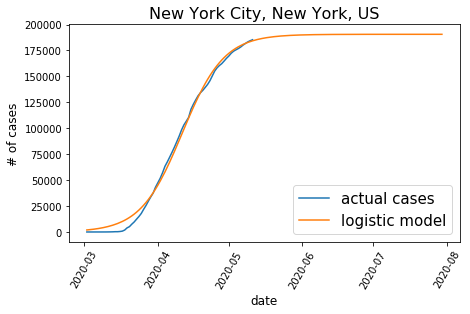

Possible maximun cases: 42959.118765365645
Hidden cases on first day: 14
RMSE from logistic model: 579.1845238700787
RMSE from linear model: 6450.031372360039
RMSE from log model: 20603.249929540892
Case increase rate apporaches 0 after 33 days


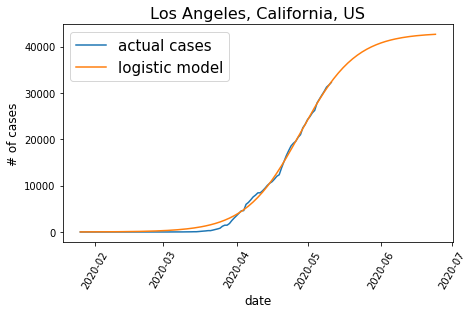

Possible maximun cases: 2589.310888960205
Hidden cases on first day: 44
RMSE from logistic model: 65.94739942125094
RMSE from linear model: 258.5216646720319
RMSE from log model: 1589.2080363439406
Case increase rate apporaches 0 after 31 days


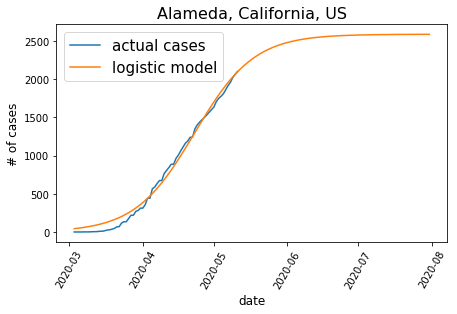

Possible maximun cases: 2415.9363362546915
Hidden cases on first day: 69
RMSE from logistic model: 73.5398044983514
RMSE from linear model: 191.403384203477
RMSE from log model: 925.1777383248419
Case increase rate apporaches 0 after 34 days


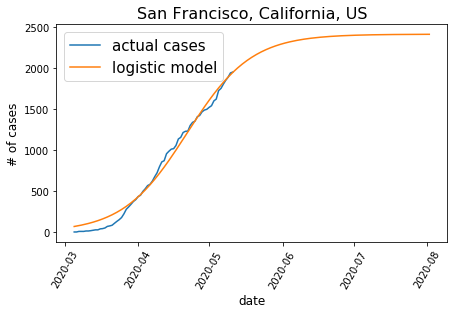

Possible maximun cases: 1171.6499028440726
Hidden cases on first day: 1
RMSE from logistic model: 38.989959288414525
RMSE from linear model: 198.82384220479724
RMSE from log model: 1075.4129836838379
Case increase rate apporaches 0 after 0 days


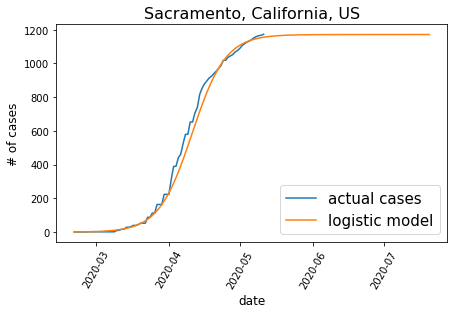

Possible maximun cases: 21463.24096024645
Hidden cases on first day: 327
RMSE from logistic model: 541.0854949547336
RMSE from linear model: 2344.0642204645355
RMSE from log model: 22262.62045988332
Case increase rate apporaches 0 after 23 days


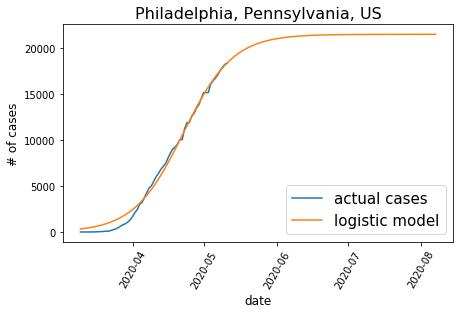

Possible maximun cases: 74562.63261161557
Hidden cases on first day: 20
RMSE from logistic model: 846.2770725917086
RMSE from linear model: 10628.243772918597
RMSE from log model: 25853.673778702923
Case increase rate apporaches 0 after 35 days


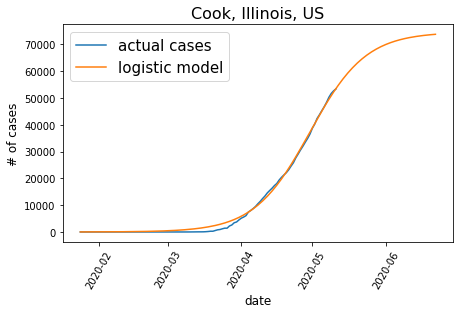

In [47]:
for c in county_choice:
    graph_logistic_curve(c, target_days=150)

Possible maximun cases: 2589.310888960205
Hidden cases on first day: 44
RMSE from logistic model: 65.94739942125094
RMSE from linear model: 258.5216646720319
RMSE from log model: 1589.2080363439406
Case increase rate apporaches 0 after 31 days


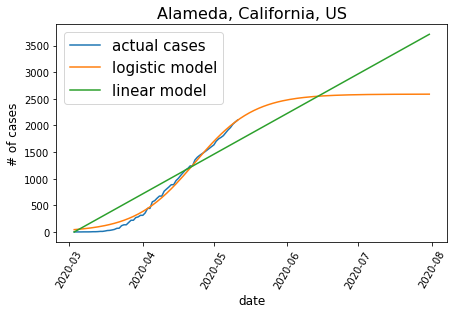

In [48]:
graph_logistic_curve('Alameda, California, US', target_days=150, linear = True)

### a5. Conclusion

From the plots above we see that, Sacramento will possibly not have any new cases. NYC will stop having new cases after roughtly a week, and with two hundred thousand cases. Other counties will stop having new cases after 4 to 6 weeks.

## b) Predict Death Rate and Reasons

Based on the data set death_data, we see that the death total of each county varies a lot. We want to find out possible reasons (features) that would cause this difference. 

We are using the following equation:

<h3><center>$ y = w_{1} * f_{1} + w_{2} * f_{2} + ... $</center></h3>

Where y is the percentage of death of a county, f1 and f2 are different features, and w is their weights (coefficient).

### b1. Find Death Rate of each county

#### We are only analyzing counties with more than 1000 confirmed cases because counties with less confirmed cases would have a crazy death rate (eg. confirmed case = 2, death = 1)

In [49]:
from sklearn.model_selection import train_test_split

# Filter out data points that are too small
dataset = cd[cd.iloc[:,-1] > 1000]
train, test = train_test_split(dataset, test_size=0.15, random_state=77)
train.head()

,CountyName,State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
2996,Yakima,Washington,"Yakima, Washington, US",0,0,0,0,0,0,0,...,1296,1372,1389,1449,1547,1579,1686,1781,1864,1916
1210,Howard,Maryland,"Howard, Maryland, US",0,0,0,0,0,0,0,...,969,992,1010,1061,1098,1138,1170,1205,1223,1234
2284,Lancaster,Pennsylvania,"Lancaster, Pennsylvania, US",0,0,0,0,0,0,0,...,1936,1991,2018,2041,2070,2122,2185,2223,2256,2295
270,El Paso,Colorado,"El Paso, Colorado, US",0,0,0,0,0,0,0,...,994,1005,1028,1055,1079,1097,1109,1124,1137,1157
314,Hartford,Connecticut,"Hartford, Connecticut, US",0,0,0,0,0,0,0,...,6112,6173,6351,6530,6750,6904,7105,7263,7358,7528


#### The following list will be the list of counties we are predicting:

In [50]:
ava_county = list(dataset['Combined_Key'])

In [51]:
# For training data, tt is much faster because we do not need a huge amount of data transformation, 
# so we used the whole qualified dataset
county_choice = list(train['Combined_Key'])

# county_choice

In [52]:
# death rate = death_total / confirmed_case
# Might take couple minutes
confirmed = []
death = []
for i in range(len(county_choice)):
    confirmed.append(select_data(county_choice, cd).iloc[i, -1:].values[0])
    death.append(select_data(county_choice, dd).iloc[i, -1:].values[0])

df = select_data(county_choice, dd).iloc[:, :4]
df['Confirmed_Cases'] = confirmed
df['Death_Total'] = death
df['Death_Rate'] = df['Death_Total'] / df['Confirmed_Cases'] * 100
df = df.sort_values('Death_Rate', ascending=False)


In [53]:
df.head(3)

,CountyName,State,Combined_Key,Population,Confirmed_Cases,Death_Total,Death_Rate
1797,Sussex,New Jersey,"Sussex, New Jersey, US",140488,1046,135,12.906310
1260,Genesee,Michigan,"Genesee, Michigan, US",405813,1782,225,12.626263
314,Hartford,Connecticut,"Hartford, Connecticut, US",891720,7528,931,12.367163


In [54]:
df.tail(3)

,CountyName,State,Combined_Key,Population,Confirmed_Cases,Death_Total,Death_Rate
710,Cass,Indiana,"Cass, Indiana, US",37689,1542,4,0.259403
2517,Trousdale,Tennessee,"Trousdale, Tennessee, US",11284,1364,3,0.219941
1371,Nobles,Minnesota,"Nobles, Minnesota, US",21629,1291,2,0.154919


From the table above, we see that the death rate of counties varies a lot. Now we want to guess several reasons that caused this.

### b2. Find Relevant Features

Based on our life experience, we search on all the column and select features that can possibly affect the death rate.

In [55]:
med.columns

Index(['CountyName', 'State', 'Combined_Key', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#Hospitals', '#ICU_beds'],
      dtype='object')

In [56]:
pop.columns

Index(['CountyName', 'State', 'Combined_Key', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'Population'],
      dtype='object')

From the given data, we select the possible features:

In [57]:
# We first compare the 2 states that has large difference on death rate
county_compare = ['Genesee, Michigan, US', 'Trousdale, Tennessee, US']

# Select relevant columns
county_med = select_data(county_compare, med)[['CountyName','DiabetesPercentage']]
county_pop = select_data(county_compare, pop)[['CountyName', 'PopMale65-742010','PopFmle65-742010',\
                                 'PopMale75-842010', 'PopFmle75-842010', 'Population']]
fea = county_med.merge(county_pop, on='CountyName')

# Clean the data
fea['PopMale65-742010'] = fea['PopMale65-742010'] * 100 / fea['Population']
fea['PopFmle65-742010'] = fea['PopFmle65-742010'] * 100 / fea['Population']
fea['PopMale75-842010'] = fea['PopMale75-842010'] * 100 / fea['Population']
fea['PopFmle75-842010'] = fea['PopFmle75-842010'] * 100 / fea['Population']
fea = fea.drop(columns={'Population'})

fea

,CountyName,DiabetesPercentage,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010
0,Genesee,11.6,3.461693,4.162016,2.031724,2.845399
1,Trousdale,6.1,2.791563,2.738391,1.134350,1.648352


Now we are ready to plot our features.

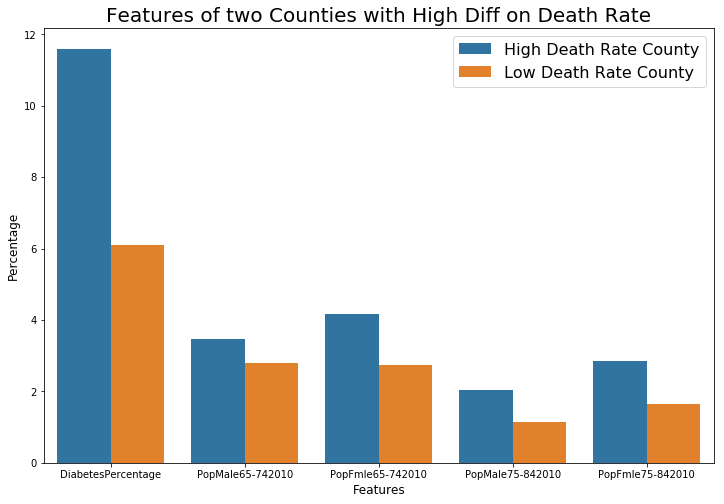

In [58]:
# Melt the dataset to have a better visualization
df=fea.melt('CountyName')

plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='CountyName', data=df)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Features of two Counties with High Diff on Death Rate', fontsize=20)
L=plt.legend(prop={'size': 16})
L.get_texts()[0].set_text('High Death Rate County')
L.get_texts()[1].set_text('Low Death Rate County')

Based on the plot above, we see some correlation between death rate and the features we select. Now recall our equation:

<h3><center>$ y = w_{1} * f_{1} + w_{2} * f_{2} + ... $</center></h3>

We now have 5 features, so there will be f1 to f5.

### b3. Train the linear model with our features

In [59]:
# Create a reusable pipeline to process the whole training set (inspired by HW5)
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than or equal to this will be removed
      upper (numeric): observations with values higher than or equal to this will be removed
    
    Output:
      a winsorized data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    return data[(data[variable] < upper) & (data[variable] > lower)]

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    county_choice = list(data['Combined_Key'])
    
    confirmed = []
    death = []
    for i in range(len(county_choice)):
        # total confirmed case and death
        confirmed.append(select_data(county_choice, cd).iloc[i, -1:].values[0])
        death.append(select_data(county_choice, dd).iloc[i, -1:].values[0])

    # Set df to a dataframe that has population of all counties
    df = select_data(county_choice, dd).iloc[:, :4]
    df['Confirmed_Cases'] = confirmed
    df['Death_Total'] = death
    df['Death_Rate'] = df['Death_Total'] / df['Confirmed_Cases'] * 100
    
    # Select relevant columns
    county_med = select_data(county_choice, med)[['CountyName','DiabetesPercentage']]
    county_pop = select_data(county_choice, pop)[['CountyName', 'PopMale65-742010','PopFmle65-742010',\
                                     'PopMale75-842010', 'PopFmle75-842010', 'Population']]
    fea = county_med.merge(county_pop, on='CountyName')

    # Clean the data
    fea['PopMale65-742010'] = fea['PopMale65-742010'] * 100 / fea['Population']
    fea['PopFmle65-742010'] = fea['PopFmle65-742010'] * 100 / fea['Population']
    fea['PopMale75-842010'] = fea['PopMale75-842010'] * 100 / fea['Population']
    fea['PopFmle75-842010'] = fea['PopFmle75-842010'] * 100 / fea['Population']
    fea = fea.drop(columns={'Population'})
    
    data = fea.merge(df[['CountyName', 'Death_Rate']], on='CountyName')
    
    
    # Return predictors and response variables separately
    X = data.drop(['CountyName', 'Death_Rate'], axis = 1)
    y = data.loc[:, 'Death_Rate']
    
    return X, y

In [60]:
# Recreate train and test set and generate features and values to predict

# Remove data points that has confirmed case less than 1000 (too small)
data = remove_outliers(cd, cd.columns[-1], lower=1000)

train, test = train_test_split(data, test_size=0.15, random_state=77)
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

In [61]:
# Train the model
from sklearn import linear_model as lm

linear_model = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

In [62]:
# Compute the model error
training_error = rmse(y_train, y_fitted)
test_error = rmse(y_test, y_predicted)
print(training_error, test_error)

2.195448469868099 2.4069771653147227


In [63]:
# Enter a county and a model to see the predicted death rate vs actual death rate
def death_rate(county, model):
    county_choice = [county]
    confirmed = []
    death = []
    for i in range(len(county_choice)):
        confirmed.append(select_data(county_choice, cd).iloc[i, -1:].values[0])
        death.append(select_data(county_choice, dd).iloc[i, -1:].values[0])

    df = select_data(county_choice, dd).iloc[:, :4]
    df['Confirmed_Cases'] = confirmed
    df['Death_Total'] = death
    df['Death_Rate'] = df['Death_Total'] / df['Confirmed_Cases'] * 100
    actual = list(df['Death_Rate'])[0]
    
    # Select relevant columns
    county_med = select_data(county_choice, med)[['CountyName','DiabetesPercentage']]
    county_pop = select_data(county_choice, pop)[['CountyName', 'PopMale65-742010','PopFmle65-742010',\
                                     'PopMale75-842010', 'PopFmle75-842010', 'Population']]
    fea = county_med.merge(county_pop, on='CountyName')

    # Clean the data
    fea['PopMale65-742010'] = fea['PopMale65-742010'] * 100 / fea['Population']
    fea['PopFmle65-742010'] = fea['PopFmle65-742010'] * 100 / fea['Population']
    fea['PopMale75-842010'] = fea['PopMale75-842010'] * 100 / fea['Population']
    fea['PopFmle75-842010'] = fea['PopFmle75-842010'] * 100 / fea['Population']
    fea = fea.drop(columns={'Population'})
    
    data = fea.merge(df[['CountyName', 'Death_Rate']], on='CountyName')
    X = data.drop(['CountyName', 'Death_Rate'], axis = 1)
    pred = model.predict(X)[0]
    
    print('The predicted death rate of ', county, ' is ', pred)
    print('The actual death rate of ', county, ' is ', actual)

In [64]:
death_rate('Alameda, California, US', linear_model)

The predicted death rate of  Alameda, California, US  is  4.496206159277495
The actual death rate of  Alameda, California, US  is  3.4692920768870135


### b4. Cross-validation and Regularization

The features in the model we use above were selected manually. We want to reduce the model error by selecting the features using cross-validation and regularization.

We first put all appropriate features in the same table:

In [65]:
med.columns

Index(['CountyName', 'State', 'Combined_Key', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#Hospitals', '#ICU_beds'],
      dtype='object')

In [66]:
pop.columns

Index(['CountyName', 'State', 'Combined_Key', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'Population'],
      dtype='object')

In [67]:
# Helper function: Insert the column of population to the dataframe
def insert_population(df):
    """
    Input:
        df: Dataframe that needs a population column
    
    """
    df = df.merge(dd[['Combined_Key', 'Population']])
    return df

### b4.1 Data Transformation

There are three kinds of features: 
- Percentage
- Count
- Count per 100,000 people

We want to convert everything into percentage

In [68]:
# pct = percentage
# ct = count
# ct100k = count per 100000 people

pct_med = med[['Combined_Key', 'DiabetesPercentage', 'Smokers_Percentage', 'RespMortalityRate2014']]
ct_med = med[['Combined_Key', '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017']]
ct100k_med = med[['Combined_Key', 'HeartDiseaseMortality', 'StrokeMortality', \
                    '#FTEHospitalTotal2017',  "TotalM.D.'s,TotNon-FedandFed2017", \
                    '#Hospitals', '#ICU_beds']]

# Convert count to percentage (count/population)
ct_med = insert_population(ct_med)
for i in range(1, len(ct_med.columns) - 1):
    ct_med[ct_med.columns[i]] = ct_med[ct_med.columns[i]] * 100 / ct_med['Population']

for i in range(1, len(ct100k_med.columns)):
    ct100k_med[ct100k_med.columns[i]] = ct100k_med[ct100k_med.columns[i]] * 100 / 100000
    
# Do the same thing for population dataset
ct_pop = pop[['Combined_Key', 'PopTotalMale2017', 'PopTotalFemale2017', \
       'PopulationEstimate65+2017', 'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010', \
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010', 'PopMale35-442010', \
       'PopFmle35-442010', 'PopMale45-542010', 'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010', \
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010', 'PopFmle65-742010', 'PopMale75-842010', \
       'PopFmle75-842010', 'Population']]
for i in range(1, len(ct_pop.columns) - 1):
    ct_pop[ct_pop.columns[i]] = ct_pop[ct_pop.columns[i]] * 100 / ct_pop['Population']
ct_pop.head()

/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Combined_Key,PopTotalMale2017,PopTotalFemale2017,PopulationEstimate65+2017,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,...,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,Population
0,"Autauga, Alabama, US",48.339866,51.006820,15.020852,2.754658,2.758238,2.761818,2.888901,2.853103,3.107269,...,7.454939,2.727810,2.790456,2.289284,2.681272,3.259410,3.923464,1.505307,2.042277,55869
1,"Baldwin, Alabama, US",46.240716,49.008216,18.999346,2.147074,2.085704,2.321779,2.268472,2.381806,2.415403,...,6.215003,2.662229,2.947580,2.565917,2.814983,3.833645,4.141394,1.961619,2.308340,223234
2,"Barbour, Alabama, US",54.018472,48.347241,19.270032,4.245321,3.021956,4.909665,3.232601,4.707121,2.616868,...,7.510330,3.686300,3.674147,3.479705,3.807826,4.322288,4.743579,2.017338,2.957142,24686
3,"Bibb, Alabama, US",54.202018,47.021524,16.218630,3.621506,3.036528,4.407431,2.750737,4.523533,2.826650,...,6.711619,3.277664,2.978476,3.054390,2.902563,3.585782,4.108243,1.652228,2.384567,22394
4,"Blount, Alabama, US",49.470826,50.852558,17.900252,2.727147,2.645869,3.000380,2.941583,2.991734,2.958877,...,6.946702,3.130080,3.258050,2.939854,3.254591,4.134818,4.648428,1.905717,2.507523,57826


In [69]:
# Helper function: Add death rate to dataframe
def add_death_rate(df):
    county_choice = list(df['Combined_Key'])
    
    confirmed = []
    death = []
    for i in range(len(county_choice)):
        confirmed.append(select_data(county_choice, cd).iloc[i, -1:].values[0])
        death.append(select_data(county_choice, dd).iloc[i, -1:].values[0])

    # Set df to a dataframe that has population of all counties
    df['Confirmed_Cases'] = confirmed
    df['Death_Total'] = death
    df['Death_Rate'] = df['Death_Total'] * 100 / df['Confirmed_Cases']
    return df

In [70]:
# Merge all features into one dataset, including death rate
# May take a while
    
med_fea = pct_med.merge(ct_med, on='Combined_Key').merge(ct100k_med, on='Combined_Key')
all_features = med_fea.merge(ct_pop, on='Combined_Key').merge(cd[['Combined_Key', cd.columns[-1]]], on='Combined_Key')
all_features = remove_outliers(all_features, all_features.columns[-1], lower=1000)
all_features = all_features.drop([all_features.columns[-1]], axis=1)
all_features = add_death_rate(all_features)

In [71]:
# Remove unnecessary data, only leave features (X_train) and label(y_train)
only_features = all_features.drop(['Combined_Key', 'Population_x', 'Population_y', 'Confirmed_Cases', \
                                   'Death_Total'], axis=1)
only_features.columns

Index(['DiabetesPercentage', 'Smokers_Percentage', 'RespMortalityRate2014',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
       'HeartDiseaseMortality', 'StrokeMortality', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#Hospitals', '#ICU_beds',
       'PopTotalMale2017', 'PopTotalFemale2017', 'PopulationEstimate65+2017',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'Death_Rate'],
      dtype='object')

### b4.2 Use Cross-Validation and Regularizaiton to choose the best features

In [72]:
# Import from lab07
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train): # index
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        Y_pred = model.predict(split_X_valid)
        error = rmse(Y_pred, split_Y_valid)


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [73]:
# We ramdomly select 10 features to train our model. We do this because we want to keep the runtime short.

errors = []
min_e = float("inf")
min_f = []

# iterate x times.
iteration = 5000
for N in range(iteration):
    model = lm.LinearRegression()
    
    # Random select 10 features
    X_train = only_features.drop(['Death_Rate'], axis=1).sample(10, axis=1)
    fs = list(X_train.columns)
    Y_train = only_features[only_features.columns[-1]]
    
    # compute the cross validation error
    error = compute_CV_error(model, X_train, Y_train)
    errors.append(error)
    
    if error < min_e:
        min_e = error
        min_f = fs

best_f = min_f
best_err = min_e

print("Best choice, use" , best_f, "as features.")
print(f"The best CV error is {best_err}.")

Best choice, use ['#EligibleforMedicare2018', 'PopFmle75-842010', '#FTEHospitalTotal2017', 'PopMale20-242010', 'PopFmle55-592010', 'PopMale60-642010', 'PopTotalMale2017', 'DiabetesPercentage', 'PopMale30-342010', 'PopFmle35-442010'] as features.
The best CV error is 2.271450618784508.


We had run the algorithm above for many times, and found the best features:

In [74]:
best_features = ['PopMale60-642010','PopFmle30-342010','RespMortalityRate2014','PopMale55-592010','#ICU_beds',
                 'PopMale35-442010','PopTotalMale2017','PopMale45-542010','PopFmle60-642010','PopFmle45-542010']
best_features

['PopMale60-642010',
 'PopFmle30-342010',
 'RespMortalityRate2014',
 'PopMale55-592010',
 '#ICU_beds',
 'PopMale35-442010',
 'PopTotalMale2017',
 'PopMale45-542010',
 'PopFmle60-642010',
 'PopFmle45-542010']

#### Use the better features to train our model

In [75]:
def best_f(data, fea):
    X_train = data[fea]
    Y_train = data[data.columns[-1]]
    return X_train, Y_train

In [76]:
model = lm.LinearRegression()

# Split train and test data
train, test = train_test_split(all_features, test_size=0.15, random_state=77)

X_train, Y_train = best_f(train, best_features)
X_test, Y_test = best_f(test, best_features)

model.fit(X_train, Y_train)
pred_y = model.predict(X_test)

rmse(pred_y, Y_test)

2.346586217048414

#### Our model performs better on the test data than the feature we chose manually. Now we want to visualize our predictions to see what it will tell us.

In [77]:
import altair as alt # For plotting

def plot_death_rate(county=None):
    model = lm.LinearRegression()
    X, Y = all_features[best_features], all_features[all_features.columns[-1]]
    model.fit(X, Y)
    pred_y = model.predict(X)
    pred_rate = all_features.copy()[['Combined_Key', 'Death_Rate']]
    pred_rate['Predicted_Death_Rate'] = pred_y
    pred_rate['Difference'] = pred_rate['Predicted_Death_Rate'] - pred_rate['Death_Rate']
    
    if county:
        if type(county) == list:
            data = select_data(county, pred_rate)
        elif type(county) == str:
            county = [county]
            data = select_data(county, pred_rate)
        else:
            raise ValueError("Must enter a county's name")
    else:
        data = pred_rate.sample(5)

    chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Combined_Key', axis=alt.Axis(title='County', labelFontSize=12)),
    y=alt.Y('Difference', axis=alt.Axis(title='The possible change of Death Rate in Percent', labelFontSize=10)),
    color=alt.condition(
        "datum.Difference > 0",
        alt.value("red"),  # The positive color
        alt.value("green")  # The negative color
        )
    ).properties(width=100*len(county),
                title='Change on Percent of Death Rate')
    
    if type(county) == list:
        for i in county:
            print('The predicted death rate of', i, 'is ', \
                  select_data([i], data)['Predicted_Death_Rate'].values[0], " .")
            print('The actual death rate of', i, 'is ', \
                  select_data([i], data)['Death_Rate'].values[0], " .")
            print()
    
    print('Some of the reasons of death rate are', best_features, ".")
    return chart

Enter the desired county to see the predicted death rate. If enter nothing, plot random 5 counties.

In [78]:
county_choice

['Yakima, Washington, US',
 'Howard, Maryland, US',
 'Lancaster, Pennsylvania, US',
 'El Paso, Colorado, US',
 'Hartford, Connecticut, US',
 'Middlesex, Massachusetts, US',
 'Allegheny, Pennsylvania, US',
 'Morris, New Jersey, US',
 'Cuyahoga, Ohio, US',
 'Wayne, Michigan, US',
 'Alameda, California, US',
 'Contra Costa, California, US',
 'Hamilton, Ohio, US',
 'Dougherty, Georgia, US',
 'Oakland, Michigan, US',
 'Mecklenburg, North Carolina, US',
 'Baltimore, Maryland, US',
 'Luzerne, Pennsylvania, US',
 'Somerset, New Jersey, US',
 'Philadelphia, Pennsylvania, US',
 'Mahoning, Ohio, US',
 'El Paso, Texas, US',
 'Kent, Delaware, US',
 'Broward, Florida, US',
 'Michigan Department of Corrections (MDOC), Michigan, US',
 'Tarrant, Texas, US',
 'Snohomish, Washington, US',
 'Monroe, New York, US',
 'Trousdale, Tennessee, US',
 'Lackawanna, Pennsylvania, US',
 'San Francisco, California, US',
 'St. Louis City, Missouri, US',
 'Santa Clara, California, US',
 'Nobles, Minnesota, US',
 'Brist

In [79]:
plot_death_rate(['Los Angeles, California, US', 'Alameda, California, US', 'Hamilton, Ohio, US'])

The predicted death rate of Los Angeles, California, US is  4.255390025524516  .
The actual death rate of Los Angeles, California, US is  4.865857697750745  .

The predicted death rate of Alameda, California, US is  5.185944207660803  .
The actual death rate of Alameda, California, US is  3.4692920768870135  .

The predicted death rate of Hamilton, Ohio, US is  6.32787009142489  .
The actual death rate of Hamilton, Ohio, US is  5.486820871436256  .

Some of the reasons of death rate are ['PopMale60-642010', 'PopFmle30-342010', 'RespMortalityRate2014', 'PopMale55-592010', '#ICU_beds', 'PopMale35-442010', 'PopTotalMale2017', 'PopMale45-542010', 'PopFmle60-642010', 'PopFmle45-542010'] .


alt.Chart(...)

#### Visualize the features

In [80]:
best = best_features + ['Combined_Key']

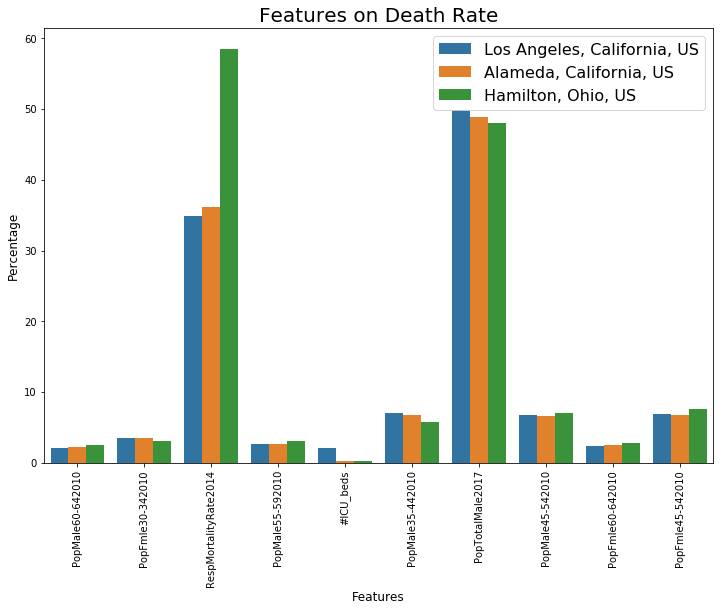

In [81]:
df=select_data(['Los Angeles, California, US', 'Alameda, California, US', 'Hamilton, Ohio, US'], \
               all_features)[best].melt('Combined_Key')


plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Combined_Key', data=df)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation = 90)
plt.title('Features on Death Rate', fontsize=20)
L=plt.legend(prop={'size': 16})
# L.get_texts()[0].set_text('High Death Rate County')
# L.get_texts()[1].set_text('Low Death Rate County')

### b5. Conclusion

Based on the plot of the death rate, we see that the death rate of Alameda and Hamilton would increase, and the death rate of Los Angeles would decrease. Based on the plot of the features, we see that low death rate county has more ICU beds per person, and high death rate county has higher respitory disease mortality, which indicates that COVID-19 is more dangerous to people with relevant disease.

# End of Project